## Libraries

In [10]:
# Pandas --> Data Frames
import pandas as pd

# numpy --> scientific computing with Python
import numpy as np

# matplotlib --> graphing library
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn --> makes matplotlib prettier
import seaborn as sb

from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

## Data

In [29]:
func = lambda x: x * np.sin(x)

N = 1000
n = 10

domain = np.linspace(0,10,N)
x_sample = pd.DataFrame(np.sort(np.random.choice(domain,n)))
y_sample = func(x_sample)

R2 =  0.0493113605256
y =  [-1.26081654]  +  [ 0.28892922]  x


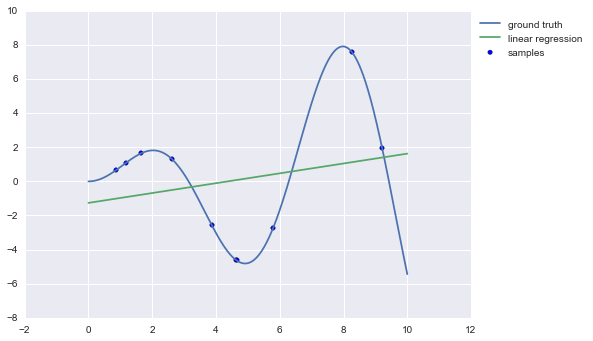

In [30]:
f = plt.plot(domain, func(domain), label = "ground truth")
f = plt.scatter(x_sample, y_sample, label = "samples")

# Linear Regression
model = LinearRegression()

model.fit(pd.DataFrame(x_sample), y_sample)
print "R2 = ", model.score(x_sample, y_sample)
print "y = ", model.intercept_, " + ", model.coef_[0], " x"

# Display linear model (passing two points, 0 & 10)
f = plt.plot([0, 10], [model.intercept_, model.intercept_ + 10 * model.coef_[0]], label="linear regression")
f = plt.legend(loc = "upper left", bbox_to_anchor=(1,1))

## Pipelines and Polynomial Features

In [44]:
# Fit all to 4th degree polynomial
degree = 4

## Scales the variables -> gets polynomial features of degree 4 -> fits linear regression
model = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression()).fit(x_sample, y_sample)
model.score(x_sample, y_sample)

0.97112645455416424

In [124]:
# Functions for plotting coefficients for using make_pipeline
# Adapted from http://www.datarobot.com/blog/regularized-linear-regression-with-scikit-learn/

def plot_coefficients(model, ax, label=None, yscale='log', ncoef=8):
    coef = model.steps[-1][1].coef_.ravel()
    coef[0] = model.steps[-1][1].intercept_.ravel()
    if yscale == 'log':
        ax.semilogy(np.abs(coef), marker='o', label=label)
        ax.set_ylim((1e-1, 1e8))
    else:
        ax.plot(np.abs(coef), marker='o', label=label)
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.set_xlim((0, ncoef))
    
def plot_approximation(model, ax, x_sample, y_sample, x_lim, y_lim, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    x_plot = np.linspace(x_lim[0], x_lim[1], 100)
    ax.scatter(x_sample, y_sample, s=10)
    ax.plot(x_plot, model.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((y_lim[0], y_lim[1]))
    ax.set_xlim((x_lim[0], x_lim[1]))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right')  #, fontsize='small')

0.0493113605256
0.538656549121
0.546908936912
0.971126454554
0.992702184668


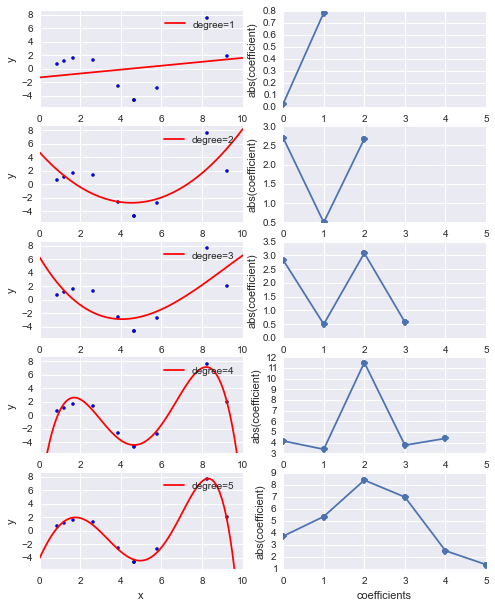

In [127]:
degrees = range(1,6)
fig, ax_rows = plt.subplots(5, 2, figsize=(8, 10))

for degree, ax_row in zip(degrees, ax_rows): 
    ax_left, ax_right = ax_row
    model = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression()).fit(x_sample, y_sample)
    print model.score(x_sample, y_sample)
    plot_approximation(model=model, ax=ax_left, y_sample=y_sample, \
                       x_lim=(0,10), y_lim=(y_sample.min()[0] - 1,y_sample.max()[0] + 1), \
                       label='degree=%r' % degree, x_sample=x_sample)
    plot_coefficients(model, ax_right, label='Polynomial (degree=%r) coefficients' % degree, yscale="none", ncoef = len(degrees))

## Add Random Error to Population

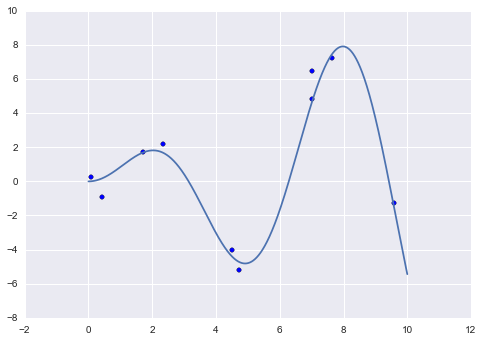

In [160]:
func = lambda x: x * np.sin(x)

N = 10000
n = 10

domain = np.linspace(0,10,N)
x_sample = pd.DataFrame(np.sort(np.random.choice(domain,n)))
y_sample = func(x_sample)
error = pd.DataFrame(np.random.normal(size=len(x_sample)))
y_sample = y_sample + error

np.random.random(len(x_sample))
f = plt.plot(domain, func(domain), label = "ground truth")
f = plt.scatter(x_sample, y_sample, label = "samples")

0.0860977859263
0.0872292275241
0.303859072504
0.909476845243
0.935515021818
0.985300177261
0.987445287063
0.989030824708
1.0


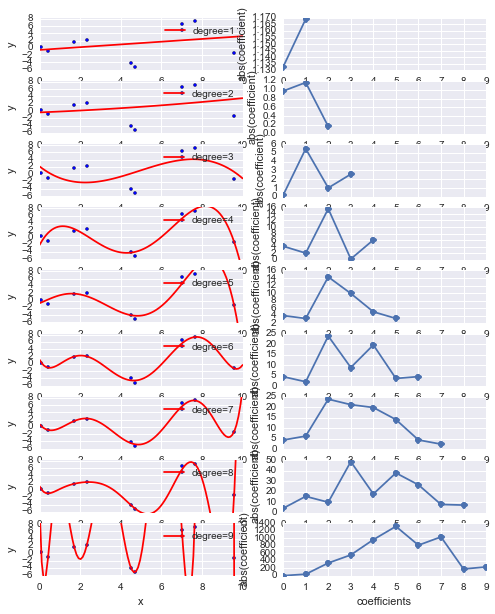

In [161]:
degrees = range(1,10)
fig, ax_rows = plt.subplots(9, 2, figsize=(8, 10))

for degree, ax_row in zip(degrees, ax_rows): 
    ax_left, ax_right = ax_row
    model = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression()).fit(x_sample, y_sample)
    print model.score(x_sample, y_sample)
    plot_approximation(model=model, ax=ax_left, y_sample=y_sample, \
                       x_lim=(0,10), y_lim=(y_sample.min()[0] - 1,y_sample.max()[0] + 1), \
                       label='degree=%r' % degree, x_sample=x_sample)
    plot_coefficients(model, ax_right, label='Polynomial (degree=%r) coefficients' % degree, yscale="none", ncoef = len(degrees))

## Train-Test-Split

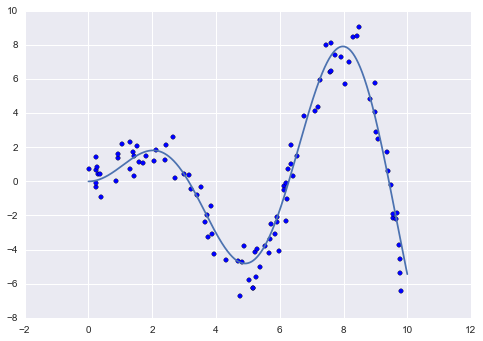

In [162]:
func = lambda x: x * np.sin(x)

N = 10000
n = 100

domain = np.linspace(0,10,N)
x_sample = pd.DataFrame(np.sort(np.random.choice(domain,n)))
y_sample = func(x_sample)
error = pd.DataFrame(np.random.normal(size=len(x_sample)))
y_sample = y_sample + error

np.random.random(len(x_sample))
f = plt.plot(domain, func(domain), label = "ground truth")
f = plt.scatter(x_sample, y_sample, label = "samples")

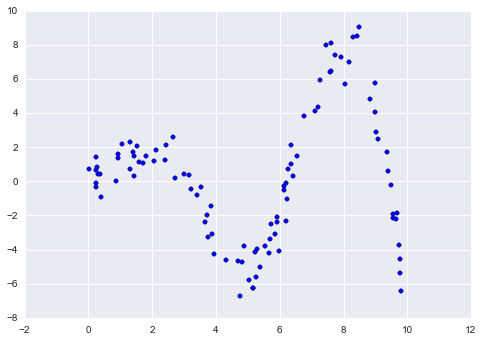

In [163]:
f = plt.scatter(x_sample, y_sample, label="samples")

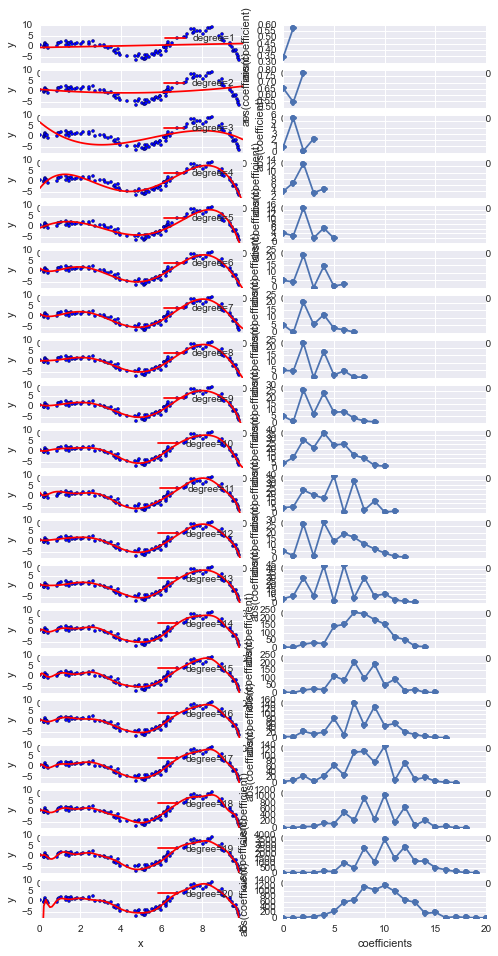

In [189]:
max_degrees = 20
degrees = range(1,max_degrees+1)
fig, ax_rows = plt.subplots(max_degrees, 2, figsize=(8, 16))

# Fit models of degree 1 to 10
    # Each model repeat train-test-split 15 times and take mean R^2

scores = {'train': {}, 'test': {}}
    
for degree, ax_row in zip(degrees, ax_rows): 
    ax_left, ax_right = ax_row
    model = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression())
    test_scores = []
    for _ in range(15):
        X_train, X_test, y_train, y_test = train_test_split(x_sample, y_sample, train_size = .7)
        model.fit( X_train, y_train )
        test_scores.append( model.score( X_test, y_test ) )
    # print "Degree = ", degree, "    train R2 = ", model.score( X_train, y_train ),  "    test R2 = ", np.mean(test_scores)
    
    scores['train'][degree] = model.score( X_train, y_train )
    scores['test'][degree] = np.mean(test_scores)
    
    plot_approximation(model=model, ax=ax_left, y_sample=y_sample, \
                       x_lim=(0,10), y_lim=(y_sample.min()[0] - 1,y_sample.max()[0] + 1), \
                       label='degree=%r' % degree, x_sample=x_sample)
    plot_coefficients(model, ax_right, label='Polynomial (degree=%r) coefficients' % degree, yscale="none", ncoef = len(degrees))

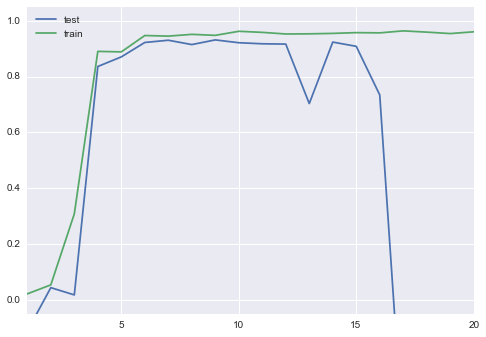

In [190]:
scores = pd.DataFrame(scores)
f = scores.plot(ylim=(-.05,1.05))

## Ridge and Lasso Regression

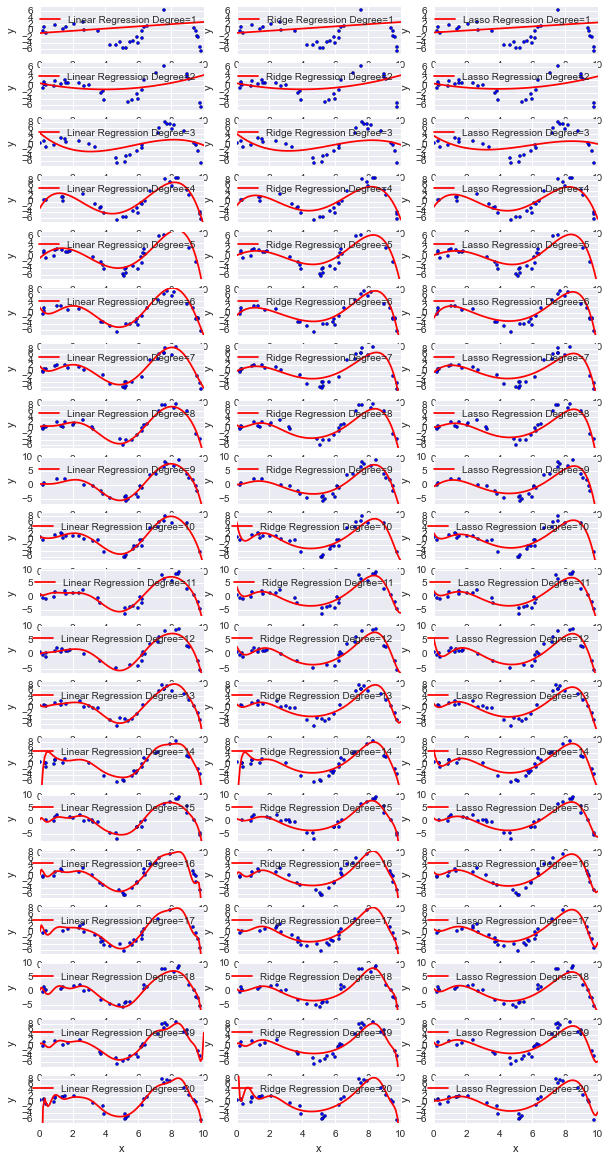

In [231]:
max_degrees = 20
degrees = range(1,max_degrees+1)
fig, ax_rows = plt.subplots(max_degrees, 3, figsize=(10, 20))

# Fit models of degree 1 to 10
    # Each model repeat train-test-split 15 times and take mean R^2

scores = {'trainLR': {}, 'testLR': {}, 'trainRR': {}, 'testRR': {},'trainLS': {}, 'testLS': {}}
    
for degree, ax_row in zip(degrees, ax_rows): 
    ax_linR, ax_ridge, ax_lasso = ax_row
    
    X_train, X_test, y_train, y_test = train_test_split(x_sample, y_sample, train_size = .7) 
    
    model = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression())
    model.fit( X_train, y_train )
    plot_approximation(model=model, ax=ax_linR, x_sample=X_test, y_sample=y_test, \
                       x_lim=(0,10), y_lim=(y_test.min()[0] - 1,y_test.max()[0] + 1), \
                       label='Linear Regression Degree=%r' % degree)
    scores['trainLR'][degree] = model.score(X_train, y_train)

    test_scores = []
    for _ in range(20):
        X_trn, X_tst, y_trn, y_tst = train_test_split(x_sample, y_sample, train_size = .7)
        model.fit( X_trn, y_trn )
        test_scores.append(model.score( X_tst, y_tst ))
    scores['testLR'][degree] = np.mean(test_scores)
    
    model = make_pipeline(StandardScaler(), PolynomialFeatures(degree), Ridge(alpha=1))
    model.fit( X_train, y_train )
    plot_approximation(model=model, ax=ax_ridge, x_sample=X_test, y_sample=y_test, \
                       x_lim=(0,10), y_lim=(y_test.min()[0] - 1,y_test.max()[0] + 1), \
                       label='Ridge Regression Degree=%r' % degree)
    scores['trainRR'][degree] = model.score(X_train, y_train)
    
    test_scores = []
    for _ in range(20):
        X_trn, X_tst, y_trn, y_tst = train_test_split(x_sample, y_sample, train_size = .7)
        model.fit( X_trn, y_trn )
        test_scores.append(model.score( X_tst, y_tst ))
    scores['testRR'][degree] = np.mean(test_scores)
    
    model = make_pipeline(StandardScaler(), PolynomialFeatures(degree), Lasso(alpha=.1))
    model.fit( X_train, y_train )
    plot_approximation(model=model, ax=ax_lasso, x_sample=X_test, y_sample=y_test, \
                       x_lim=(0,10), y_lim=(y_test.min()[0] - 1,y_test.max()[0] + 1), \
                       label='Lasso Regression Degree=%r' % degree)
    scores['trainLS'][degree] = model.score(X_train, y_train)
    
    test_scores = []
    for _ in range(20):
        X_trn, X_tst, y_trn, y_tst = train_test_split(x_sample, y_sample, train_size = .7)
        model.fit( X_trn, y_trn )
        test_scores.append(model.score( X_tst, y_tst ))
    scores['testLS'][degree] = np.mean(test_scores)
    

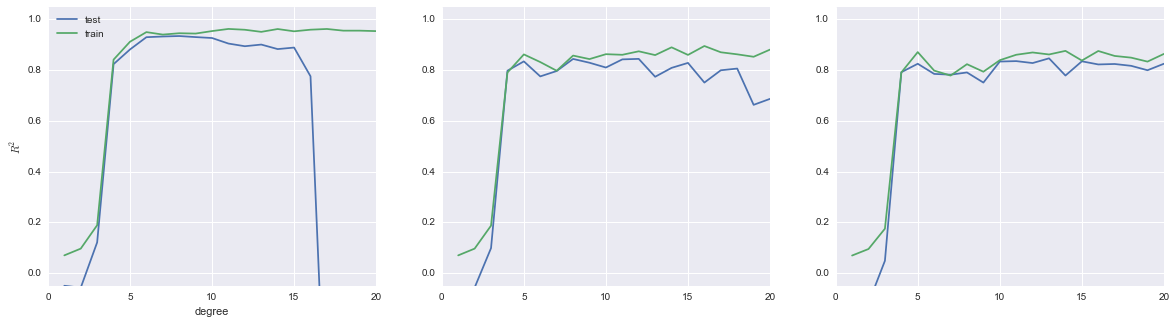

In [238]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

scores = pd.DataFrame(scores)

axes[0].plot(scores.index, scores['testLR'], label = 'test')
axes[0].plot(scores.index, scores['trainLR'], label = 'train')
axes[0].set_ylim([-0.05, 1.05])
axes[0].set_xlabel('degree'), axes[0].set_ylabel('$R^2$')
axes[0].legend(loc=0)

axes[1].plot(scores.index, scores['testRR'], label = 'test')
axes[1].plot(scores.index, scores['trainRR'], label = 'train')
axes[1].set_ylim([-0.05, 1.05])

axes[2].plot(scores.index, scores['testLS'], label = 'test')
axes[2].plot(scores.index, scores['trainLS'], label = 'train')
f = axes[2].set_ylim([-0.05, 1.05])
